In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('./data/recentyears.csv')
df

,年,月,南半球平均温度,北半球平均温度,热带平均温度,南温带平均温度,北温带平均温度,澳大利亚平均温度,美国平均温度,中国平均温度,印尼平均温度
0,1899,1,22.009579,9.365654,21.927674,17.630000,2.803077,17.741000,1.568667,-1.707529,25.862500
1,1899,2,22.262368,11.469580,23.084116,18.794600,5.104442,20.234500,0.130667,1.557353,25.758000
2,1899,3,22.323000,15.066198,24.859233,17.960200,9.341365,18.914000,4.161667,6.888647,25.947000
3,1899,4,21.079053,19.147469,25.557837,15.182000,14.933654,16.258000,10.742000,13.200118,26.101500
4,1899,5,19.389053,22.827704,25.845907,12.175400,20.099712,12.804500,14.221000,19.062412,26.653500
...,...,...,...,...,...,...,...,...,...,...,...
1481,2022,6,21.267140,29.284586,24.293534,10.665363,23.970267,15.742980,20.533595,18.480379,25.945530
1482,2022,7,20.628030,23.915871,28.604921,11.492332,28.225847,15.515358,23.995589,21.267973,26.066153
1483,2022,8,19.954941,28.666738,25.046134,14.578219,24.382067,17.064545,23.134584,20.095077,26.991987
1484,2022,9,19.289010,25.246634,28.805304,13.482711,22.502592,22.441567,19.256957,14.681354,26.029269


In [4]:
new_df = df.loc[df['年']>=1998]
new_df = new_df.loc[new_df['年']<=2016].reset_index(drop=True)
new_df = new_df[['年', '南半球平均温度', '北半球平均温度']]
mean_temp = new_df[['南半球平均温度', '北半球平均温度']].mean(axis=1).to_numpy()
dt_temp_df = new_df[['年']]
dt_temp_df['mean_temp'] = mean_temp
dt_temp = pd.pivot_table(dt_temp_df, values="mean_temp",index=["年"])
dt_temp

C:\Users\Ty Zhang\AppData\Local\Temp\ipykernel_17032\679903467.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_temp_df['mean_temp'] = mean_temp


,mean_temp
年,
1998,20.570763
1999,20.236026
2000,20.115234
2001,20.286923
2002,20.462338
2003,20.307938
2004,20.249502
2005,20.312918
2006,20.359135


In [5]:
fires = pd.read_csv('./data/amazon.csv', encoding = "ISO-8859-1")
fires.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [6]:
#Creating a pivot to get the total number of fires and the year
amazon_fire = pd.pivot_table(fires, values="number",index=["year"],aggfunc=np.sum).reset_index()
#Reading the pivot table generated
amazon_fire = amazon_fire[:-1]
pivot1 = amazon_fire
amazon_fire

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600
5,2003,42760.674
6,2004,38453.163
7,2005,35004.965
8,2006,33832.161
9,2007,33037.413


In [7]:
scaler = MinMaxScaler()

In [8]:
number = amazon_fire['number'].to_numpy().reshape(-1, 1)
amazon_fire_scaled = scaler.fit_transform(number)
amazon_fire_scaled = np.array(amazon_fire_scaled)
amazon_fire['number_scaled'] =amazon_fire_scaled

In [9]:
amazon_fire

,year,number,number_scaled
0,1998,20013.971,0.000000
1,1999,26882.821,0.301971
2,2000,27351.251,0.322565
3,2001,29071.612,0.398196
4,2002,37390.600,0.763919
5,2003,42760.674,1.000000
6,2004,38453.163,0.810631
7,2005,35004.965,0.659040
8,2006,33832.161,0.607481
9,2007,33037.413,0.572542


Text(0.5, 1.0, 'Number of Fires by Year')

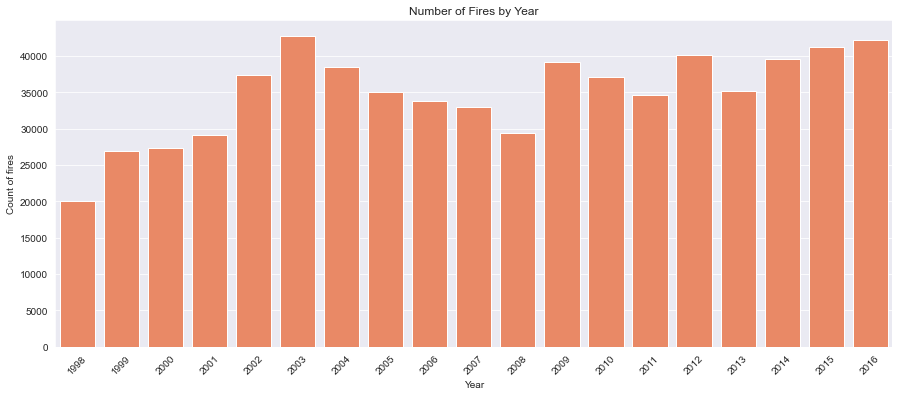

In [10]:
#Plotting the graph
plt.figure(figsize=(15, 6))
sns.set_style("darkgrid")
ax = sns.barplot(x=pivot1['year'], y="number", color="coral", data=pivot1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel("Year")
plt.ylabel("Count of fires")
plt.title("Number of Fires by Year")

下面画对数据归一化后的图

Text(0.5, 1.0, 'Number of Fires by Year')

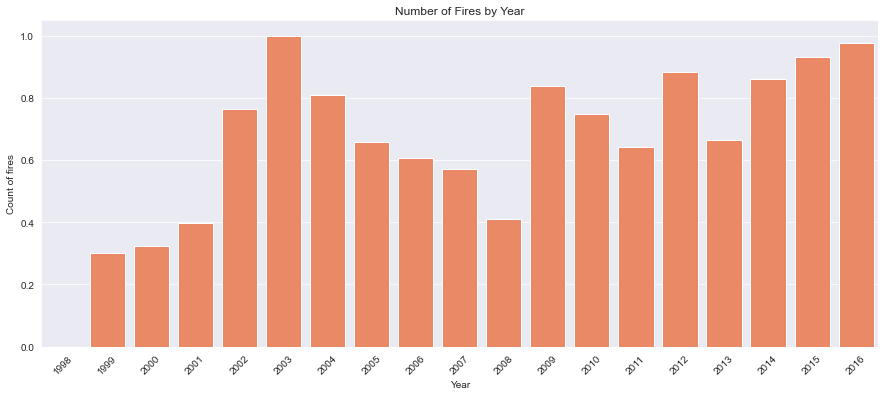

In [11]:
#Plotting the graph
plt.figure(figsize=(15, 6))
sns.set_style("darkgrid")
ax = sns.barplot(x=amazon_fire['year'], y=amazon_fire['number_scaled'], color="coral", data=pivot1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel("Year")
plt.ylabel("Count of fires")
plt.title("Number of Fires by Year")

下面处理火山活动数据

数据范围为1998~2016

In [12]:
eruptions = pd.read_csv('./data/eruptions.csv')
eruptions = eruptions.loc[eruptions['start_year']>=1998]['start_year']
eruptions = pd.DataFrame(eruptions).reset_index(drop=True)
eruptions['T'] = 1
eruptions

,start_year,T
0,2020.0,1
1,2020.0,1
2,2020.0,1
3,2020.0,1
4,2020.0,1
...,...,...
918,1998.0,1
919,1998.0,1
920,1998.0,1
921,1998.0,1


In [13]:
erup_year = eruptions.groupby(['start_year']).count().reset_index()
erup_year = erup_year[0:19]
erup_year

,start_year,T
0,1998.0,37
1,1999.0,44
2,2000.0,48
3,2001.0,42
4,2002.0,51
5,2003.0,36
6,2004.0,54
7,2005.0,51
8,2006.0,46
9,2007.0,39


In [14]:
time = erup_year['T'].to_numpy().reshape(-1, 1)
time_scaled = scaler.fit_transform(time)
erup_year['Time_sacled'] = time_scaled
erup_year

,start_year,T,Time_sacled
0,1998.0,37,0.105263
1,1999.0,44,0.473684
2,2000.0,48,0.684211
3,2001.0,42,0.368421
4,2002.0,51,0.842105
5,2003.0,36,0.052632
6,2004.0,54,1.000000
7,2005.0,51,0.842105
8,2006.0,46,0.578947
9,2007.0,39,0.210526


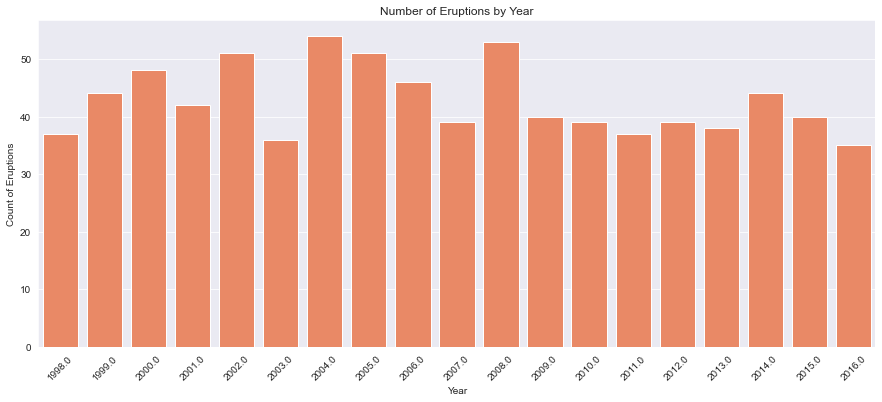

In [15]:
#Plotting the graph
plt.figure(figsize=(15, 6))
sns.set_style("darkgrid")
ax = sns.barplot(x=erup_year['start_year'], y=erup_year['T'], color="coral", data=pivot1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel("Year")
plt.ylabel("Count of Eruptions")
plt.title("Number of Eruptions by Year")
plt.show()

下面开始读取二氧化碳数据

In [16]:
carbon = pd.read_csv('./data/carbon.csv')
carbon

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06
...,...,...,...,...,...,...,...
715,2017,8,2017.6219,NaN,NaN,NaN,NaN
716,2017,9,2017.7068,NaN,NaN,NaN,NaN
717,2017,10,2017.7890,NaN,NaN,NaN,NaN
718,2017,11,2017.8740,NaN,NaN,NaN,NaN


In [17]:
carbon.dropna(inplace=True)
carbon.reset_index(inplace=True, drop=True)
carbon

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,3,1958.2027,315.69,314.42,316.18,314.89
1,1958,4,1958.2877,317.45,315.15,317.30,314.98
2,1958,5,1958.3699,317.50,314.73,317.83,315.06
3,1958,7,1958.5370,315.86,315.17,315.87,315.21
4,1958,8,1958.6219,314.93,316.17,314.01,315.29
...,...,...,...,...,...,...,...
697,2016,9,2016.7077,401.01,404.52,401.33,404.85
698,2016,10,2016.7896,401.50,405.12,401.48,405.09
699,2016,11,2016.8743,403.64,405.92,403.08,405.34
700,2016,12,2016.9563,404.55,405.49,404.66,405.58


In [18]:
carbon_pivot = pd.pivot_table(carbon, values="Carbon Dioxide (ppm)",index=["Year"]).reset_index()
carbon_pivot = carbon_pivot[40:-1]
carbon_pivot

,Year,Carbon Dioxide (ppm)
40,1998,366.630000
41,1999,368.313333
42,2000,369.475000
43,2001,371.020833
44,2002,373.096667
45,2003,375.636667
46,2004,377.362500
47,2005,379.610000
48,2006,381.808333
49,2007,383.592500


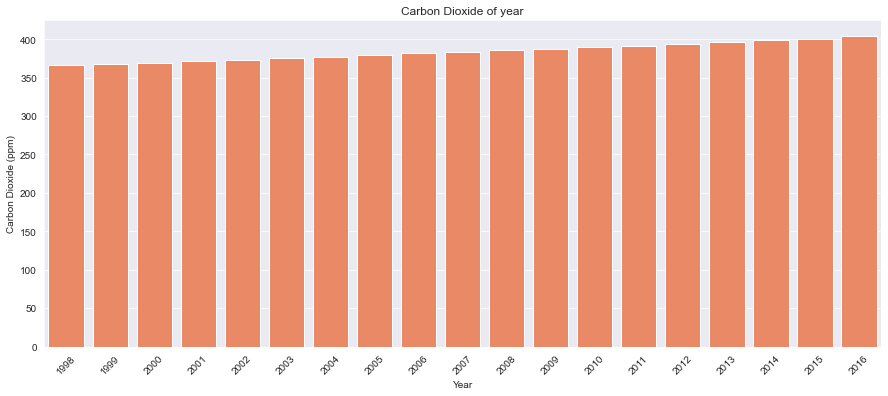

In [21]:
#Plotting the graph
plt.figure(figsize=(15, 6))
sns.set_style("darkgrid")
ax = sns.barplot(x=carbon_pivot['Year'], y=carbon_pivot['Carbon Dioxide (ppm)'], color="coral", data=pivot1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel("Year")
plt.ylabel("Carbon Dioxide (ppm)")
plt.title("Carbon Dioxide of year")
plt.show()

In [134]:
dt_temp_fire_erup_carb = dt_temp.reset_index()
dt_temp_fire_erup_carb

,年,mean_temp
0,1998,20.570763
1,1999,20.236026
2,2000,20.115234
3,2001,20.286923
4,2002,20.462338
5,2003,20.307938
6,2004,20.249502
7,2005,20.312918
8,2006,20.359135
9,2007,20.404318


In [135]:
dt_temp_fire_erup_carb['火灾次数'] = amazon_fire['number_scaled']
dt_temp_fire_erup_carb

,年,mean_temp,火灾次数
0,1998,20.570763,0.000000
1,1999,20.236026,0.301971
2,2000,20.115234,0.322565
3,2001,20.286923,0.398196
4,2002,20.462338,0.763919
5,2003,20.307938,1.000000
6,2004,20.249502,0.810631
7,2005,20.312918,0.659040
8,2006,20.359135,0.607481
9,2007,20.404318,0.572542


In [136]:
dt_temp_fire_erup_carb['火山爆发次数'] = erup_year['Time_sacled']
dt_temp_fire_erup_carb

,年,mean_temp,火灾次数,火山爆发次数
0,1998,20.570763,0.000000,0.105263
1,1999,20.236026,0.301971,0.473684
2,2000,20.115234,0.322565,0.684211
3,2001,20.286923,0.398196,0.368421
4,2002,20.462338,0.763919,0.842105
5,2003,20.307938,1.000000,0.052632
6,2004,20.249502,0.810631,1.000000
7,2005,20.312918,0.659040,0.842105
8,2006,20.359135,0.607481,0.578947
9,2007,20.404318,0.572542,0.210526


In [142]:
dt_temp_fire_erup_carb['二氧化碳浓度'] = carbon_pivot['Carbon Dioxide (ppm)'].reset_index(drop=True)
dt_temp_fire_erup_carb

,年,mean_temp,火灾次数,火山爆发次数,二氧化碳浓度
0,1998,20.570763,0.000000,0.105263,366.630000
1,1999,20.236026,0.301971,0.473684,368.313333
2,2000,20.115234,0.322565,0.684211,369.475000
3,2001,20.286923,0.398196,0.368421,371.020833
4,2002,20.462338,0.763919,0.842105,373.096667
5,2003,20.307938,1.000000,0.052632,375.636667
6,2004,20.249502,0.810631,1.000000,377.362500
7,2005,20.312918,0.659040,0.842105,379.610000
8,2006,20.359135,0.607481,0.578947,381.808333
9,2007,20.404318,0.572542,0.210526,383.592500


In [ ]:
dt_temp_fire_erup_carb.to_csv('./回归分析数据.csv', index=False)